# Imports

In [1]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, mean_squared_error, accuracy_score

In [2]:
data = pd.read_csv('Preprocessed.csv')

# Encoding and train/test split

Discretization by binning

In [3]:
#bins = [0, 1, 5, 10, 15, 20, 30]  # max value in the bin
#labels = ['No Depression', 'Minimal Depression', 'Mild Depression', 'Moderate Depression', 'Moderately Severe Depression', 'Severe Depression'] # bin labels

#bins = [0, 10, 20, 30]  # max value in the bin
#labels = ['Minimal Depression', 'Moderate Depression', 'Severe Depression'] # bin labels

#data['Depression category'] = pd.cut(data['Depression value'], bins=bins, labels=labels, right=False)
data["Depression category"] = data["Depression value"].map(lambda x: 1 if x > 10 else 0)


In [4]:
bins = [0, 1, 5, 10, 15, 40]  # max value in the bin
labels = ['No Anxiety', 'Minimal Anxiety', 'Mild Anxiety', 'Moderate Anxiety', 'Severe Anxiety'] # bin labels
data['Anxiety category'] = pd.cut(data['Anxiety value'], bins=bins, labels=labels)

In [5]:
bins = [0, 1, 10, 20, 60]  # max value in the bin
labels = ['No Stress', 'Low Stress', 'Mild Stress', 'High Perceived Stress'] # bin labels
data['Stress category'] = pd.cut(data['Stress value'], bins=bins, labels=labels)

In [6]:
le = LabelEncoder()

for column in ["Age", "Gender", "University", "Department", "Current CGPA", "Year", "Anxiety category", "Stress category"]:
    data[column] = le.fit_transform(data[column])

Now we divide our dataset into X (all the attributes that aren't "Depression value" which is the attribute we want to predict) and y which contains only the values for "Depression value". We split 70% for testing and 30% for test.

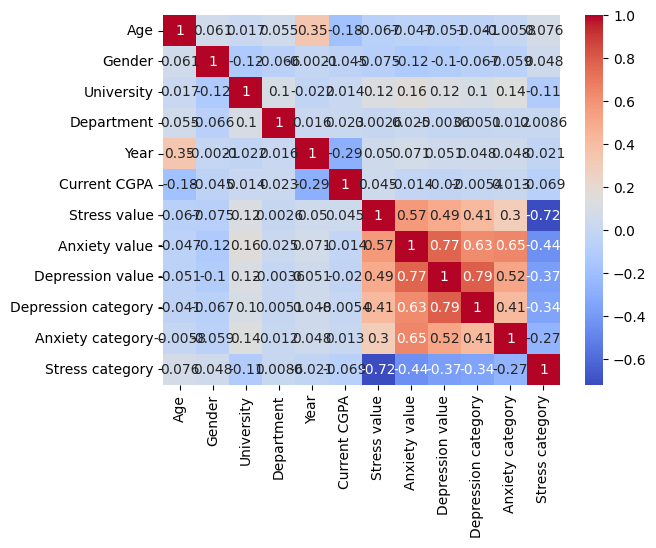

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [8]:
X = data.drop(columns=["Depression value", "Depression category", "University", "Department", "Anxiety value", "Stress value"]) 
y = data["Depression category"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Hyperparameters search

In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50],
    'criterion': ['gini', 'entropy']
}

dt_model = RandomForestClassifier()

# Set up the GridSearch
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    scoring='accuracy',  # or other metrics like 'f1_weighted' or 'precision'
    cv=5,                # 5-fold cross-validation
    verbose=2,
    n_jobs=-1            # Use all available cores
)

# Perform the search
grid_search.fit(X_train, y_train)

# Best parameters and performance
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] END criterion=gini, max_depth=10, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=auto, n_estimators=50; total time=   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
110 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
Best cross-validation accuracy: 0.783604938271605


# DecisionTreeClassifier

In [10]:
rf = RandomForestClassifier(max_depth=3, max_features='log2', criterion='entropy', n_estimators=10)
rf = rf.fit(X_train, y_train)

In [11]:
y_test_pred = rf.predict(X_test)

In [12]:
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred)}")

Test Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.56      0.65       128
           1       0.82      0.92      0.87       278

    accuracy                           0.81       406
   macro avg       0.79      0.74      0.76       406
weighted avg       0.80      0.81      0.80       406

Test Accuracy: 0.8078817733990148


In [13]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Confusion Matrix:
 [[ 72  56]
 [ 22 256]]


[Text(0.5, 0.875, 'x[4] <= 1.5\nentropy = 0.9\nsamples = 1014\nvalue = [512, 1110]'),
 Text(0.25, 0.625, 'x[4] <= 0.5\nentropy = 0.928\nsamples = 334\nvalue = [353, 185]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[2] <= 3.5\nentropy = 0.98\nsamples = 260\nvalue = [236, 169]'),
 Text(0.0625, 0.125, 'entropy = 0.996\nsamples = 202\nvalue = [169, 146]'),
 Text(0.1875, 0.125, 'entropy = 0.82\nsamples = 58\nvalue = [67, 23]'),
 Text(0.375, 0.375, 'x[2] <= 0.5\nentropy = 0.53\nsamples = 74\nvalue = [117, 16]'),
 Text(0.3125, 0.125, 'entropy = 0.811\nsamples = 2\nvalue = [1, 3]'),
 Text(0.4375, 0.125, 'entropy = 0.471\nsamples = 72\nvalue = [116, 13]'),
 Text(0.75, 0.625, 'x[4] <= 4.5\nentropy = 0.601\nsamples = 680\nvalue = [159, 925]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[4] <= 3.5\nentropy = 0.505\nsamples = 649\nvalue = [116, 922]'),
 Text(0.5625, 0.125, 'entropy = 0.742\nsamples = 317\nvalue = [105, 394]'),
 Text(0.6875, 0.125, 'entropy = 0.144\nsamples = 33

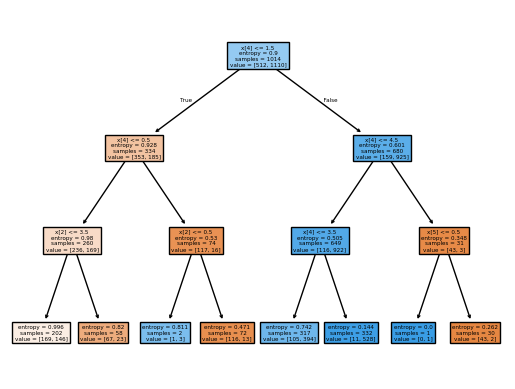

In [14]:
tree.plot_tree(rf.estimators_[0], filled=True)